In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats
%matplotlib inline
import os

import seaborn as sns
import zipfile


In [2]:
train_data=pd.read_csv(r'C:\Users\payal2.bhatia\Desktop\export_train_dataframe.csv')

In [3]:
train_data.head(2)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m11,m12,m13,loan_term_labels,LTV_scale_10,Risk_Level,LTV_quantile_range,LTV_quantile_label,DTI_scale_10,1st pd afterDays
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,Mar,May,95,1.0,...,0,0,1,330-360,10.0,High Risk,"(80.0, 97.0]",75-100Q,2.0,61
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,Jan,Mar,72,1.0,...,1,0,1,330-360,7.0,Good Risk,"(57.0, 72.0]",25-50Q,4.0,60


In [11]:
import pylib
import plotly

In [3]:
train_data["insurance_type"]=train_data["insurance_type"].astype("object")

In [137]:
train_data["logodd_m13"]=num_data["m13"].apply(lambda x: np.where(x==1, np.log((636/115422)/(1-636/115422)), np.log((1-636/115422)/(636/115422))
))

In [10]:
num_columns=[i for i in train_data.columns if train_data[i].dtype != "object"]
cat_columns=[i for i in train_data.columns if train_data[i].dtype == "object"]

In [5]:
len(num_columns), len(cat_columns)

(26, 10)

In [11]:
num_data=train_data.filter(num_columns)

In [38]:
num_columns

['loan_id',
 'interest_rate',
 'unpaid_principal_bal',
 'loan_term',
 'loan_to_value',
 'number_of_borrowers',
 'debt_to_income_ratio',
 'borrower_credit_score',
 'insurance_percent',
 'co-borrower_credit_score',
 'insurance_type',
 'm1',
 'm2',
 'm3',
 'm4',
 'm5',
 'm6',
 'm7',
 'm8',
 'm9',
 'm10',
 'm11',
 'm12',
 'm13',
 'LTV_scale_10',
 'DTI_scale_10',
 '1st pd afterDays']

In [6]:
pd.Series(num_data.iloc[0,:])

loan_id                     2.680550e+11
interest_rate               4.250000e+00
unpaid_principal_bal        2.140000e+05
loan_term                   3.600000e+02
loan_to_value               9.500000e+01
number_of_borrowers         1.000000e+00
debt_to_income_ratio        2.200000e+01
borrower_credit_score       6.940000e+02
insurance_percent           3.000000e+01
co-borrower_credit_score    0.000000e+00
insurance_type              0.000000e+00
m1                          0.000000e+00
m2                          0.000000e+00
m3                          0.000000e+00
m4                          0.000000e+00
m5                          0.000000e+00
m6                          0.000000e+00
m7                          1.000000e+00
m8                          0.000000e+00
m9                          0.000000e+00
m10                         0.000000e+00
m11                         0.000000e+00
m12                         0.000000e+00
m13                         1.000000e+00
LTV_scale_10    

In [7]:
num_data.columns

Index(['loan_id', 'interest_rate', 'unpaid_principal_bal', 'loan_term',
       'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio',
       'borrower_credit_score', 'insurance_percent',
       'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4',
       'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13',
       'LTV_scale_10', 'DTI_scale_10', '1st pd afterDays'],
      dtype='object')

#### Interactions

In [8]:
interest_data=num_data[['interest_rate','loan_term']]

In [9]:
interest_data.corr()

,interest_rate,loan_term
interest_rate,1.000000,0.720734
loan_term,0.720734,1.000000


loan_term and interest has high correlation

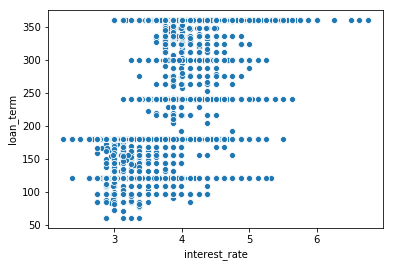

In [10]:
sns.scatterplot(interest_data["interest_rate"], interest_data["loan_term"])

In [8]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
res = pf.fit_transform(interest_data)
res.shape

NameError: name 'interest_data' is not defined

In [12]:
pd.DataFrame(pf.powers_, columns=['interest_rate_degree',  'loan_term_degree',
       ])

,interest_rate_degree,loan_term_degree
0,1,0
1,0,1
2,2,0
3,1,1
4,0,2


In [7]:
intr_features = pd.DataFrame(res, columns=['interest_rate', 'loan_term', 'interest_rate^2', 'interest_rate x loan_term', 'loan_term^2'])
intr_features.head(5)

NameError: name 'res' is not defined

In [15]:
intr_features=pd.concat([intr_features, train_data["m13"]], axis=1)

In [236]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import compute_class_weight

weights=compute_class_weight("balanced",np.unique(train_data["m13"]),train_data["m13"])

LogReg=LogisticRegression(class_weight="balanced",fit_intercept = False, C = 1e9)


In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, cross_validate

In [93]:
# X=intr_features.drop(train_data[["m13"]], axis=1, inplace=True)

In [42]:
Y=train_data[["m13"]]


In [165]:
X_train, X_test, y_train, y_test=train_test_split(intr_features, Y)

In [151]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((87043, 5), (29015, 5), (87043, 1), (29015, 1))

In [237]:
fit=LogReg.fit(X_train, y_train)

C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [153]:
y_pred=LogReg.predict(X_test)

In [154]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[20339,  8504],
       [   70,   102]], dtype=int64)

In [155]:
 tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()

In [156]:
 tn, fp, fn, tp

(20339, 8504, 70, 102)

In [157]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1-Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.7044976736170946
Precision: 0.011852196142226355
Recall: 0.5930232558139535
f1-Score: 0.023239917976760085


In [158]:
print(np.exp(fit.coef_))

[[0.99668606 0.97473463 1.10255969 1.00343688 1.0000193 ]]


##### Statsmodel Logistic

In [230]:
from patsy import dmatrices
import statsmodels.api as sm 

# y, X = dmatrices( 'y_train ~ X_train', data=X_train, return_type='dataframe')
# # print(y)
# # print(X)
X_train = pd.DataFrame(X_train)
# X_train.columns = independent_vars
print(X_train.shape)
X_test = pd.DataFrame(X_test)
# X_test.columns = independent_vars
y_train = pd.DataFrame(y_train)
print(y_train.shape)
y_test = pd.DataFrame(y_test)
logit = sm.Logit(y_train,X_train,missing='drop')
y, X = dmatrices( 'y_train ~ X_train', data=X_train, return_type='dataframe')
logit = sm.Logit(y_train,X_train,missing='drop')
result = logit.fit()
print (result.summary())


(87043, 5)
(87043, 1)
Optimization terminated successfully.
         Current function value: 0.032886
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                87043
Model:                          Logit   Df Residuals:                    87038
Method:                           MLE   Df Model:                            4
Date:                Tue, 10 Sep 2019   Pseudo R-squ.:                 0.04113
Time:                        17:59:39   Log-Likelihood:                -2862.5
converged:                       True   LL-Null:                       -2985.2
                                        LLR p-value:                 5.901e-52
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
interest_rate                -2.0124      0.516     -3.

In [238]:
logit.fit().params, fit.coef_

Optimization terminated successfully.
         Current function value: 0.032886
         Iterations 10


(interest_rate               -2.012356
 loan_term                   -0.029263
 interest_rate^2              0.203838
 interest_rate x loan_term    0.005616
 loan_term^2                  0.000014
 dtype: float64, array([[ 2.88524085e-03, -2.70235769e-02,  7.07158390e-02,
          4.44965910e-03,  1.48238647e-05]]))

In [250]:
y_pred1=fit.predict_proba(X_test,)

#The first column is the probability that the entry has the -1 label 
#and the second column is the probability that the entry has the +1 label.
y_pred2=fit.predict_log_proba(X_test)

In [261]:
np.log(0.296182), np.log(0.296182/(1-0.296182))

-1.2167811487451636

In [268]:
pd.Series(y_pred1[:,1]).apply(lambda x: np.log(x/1-x))

0       -inf
1       -inf
2       -inf
3       -inf
4       -inf
5       -inf
6       -inf
7       -inf
8       -inf
9       -inf
10      -inf
11      -inf
12      -inf
13      -inf
14      -inf
15      -inf
16      -inf
17      -inf
18      -inf
19      -inf
20      -inf
21      -inf
22      -inf
23      -inf
24      -inf
25      -inf
26      -inf
27      -inf
28      -inf
29      -inf
        ... 
28985   -inf
28986   -inf
28987   -inf
28988   -inf
28989   -inf
28990   -inf
28991   -inf
28992   -inf
28993   -inf
28994   -inf
28995   -inf
28996   -inf
28997   -inf
28998   -inf
28999   -inf
29000   -inf
29001   -inf
29002   -inf
29003   -inf
29004   -inf
29005   -inf
29006   -inf
29007   -inf
29008   -inf
29009   -inf
29010   -inf
29011   -inf
29012   -inf
29013   -inf
29014   -inf
Length: 29015, dtype: float64

In [232]:
pred=result.predict(np.log(X_test), transform=True)

C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


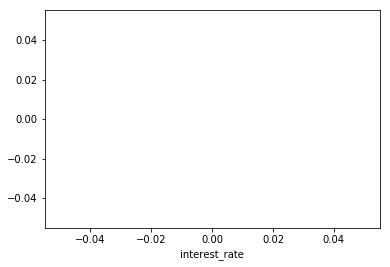

In [265]:
sns.scatterplot(X_test["interest_rate"], (np.log((y_pred1[:,1])/1-y_pred1[:,1])))

#blue is logprob, orange is prob

In [234]:
def prob(x):
    odds=np.exp(x)
    prob=(odds/1+odds)
    return prob
pred.apply(lambda x: prob(x))


16670     2.237634
29998     2.213389
68487     2.251454
43215     2.251454
28712     2.224990
68739     2.180935
46678     2.180935
36673     2.266603
25857     2.175354
88954     2.189898
101398    2.151077
51212     2.133546
97201     2.199595
44031     2.251454
97352     2.189898
48153     2.251454
58800     2.151077
69943     2.164926
58504     2.180935
51978     2.182594
70313     2.180935
1235      2.190677
84823     2.283262
58022     2.189898
64058     2.180935
61283     2.191776
68855     2.268989
46520     2.189898
106982    2.180935
28526     2.164926
            ...   
30006     2.180935
14875     2.157757
48586     2.189898
88929     2.166445
78121     2.184483
61253     2.199595
48061     2.164926
106524    2.237634
111153    2.253714
20392     2.151077
94264     2.157757
63568     2.135674
98451     2.172633
67811     2.189898
81365     2.237634
13557     2.189898
39768     2.164926
82083     2.189898
53911     2.139009
79210     2.181627
95514     2.164926
33111     2.

In [215]:
from scipy.stats.stats import pearsonr   
print (pearsonr(pred,(X_test["interest_rate"])))
print(pearsonr(pred,X_test["loan_term"]))
print(pearsonr(pred,X_test["interest_rate x loan_term"]))
print(pearsonr(pred,X_test["loan_term^2"]))
print(pearsonr(pred,X_test["interest_rate^2"]))

(-0.9799291332833839, 0.0)
(-0.7776484386749926, 0.0)
(-0.8762964425935292, 0.0)
(-0.7691307012889835, 0.0)
(-0.9591548417020159, 0.0)


In [216]:
pred.describe()

count    29015.000000
mean         0.093664
std          0.017446
min          0.039449
25%          0.082792
50%          0.090708
75%          0.105960
max          0.182984
dtype: float64


This means log(p/(1-p)) = -16.0047 

0    86579
1      464
total 87043

p(1)=0.005330698620222189
p(0)=0.9946693013797778

odds(1)=0.005359267258804098

log(odds(1))=-7.209929487558048 w/o predictor (np.log(64/86579))

now in above summary , the estimated coefficient for the intercept i.e -16.0047  is the log odds of a delinqunet with other variables as zero hypothetically
exp(-16.0047)=1.1200750040407942e-07


log(p/(1-p))=-16.0047 + 4.8034*interest_rate -0.0161*loan_term -0.4864*interest_rate^2
      +0.0037 *'interest_rate x loan_term'+ -2.635e-06*'loan_term^2'


With a unit increase in interest rate np.exp(4.8034)= 121.9242560651631-- 12000% increase to delinquent ; holding all other variables constant


In [92]:
params = res.params
conf = res.conf_int()
conf['OddsRatio'] = params
conf.columns = ['2.5%', '97.5%', 'OddsRatio']
print(np.exp(conf))

                    2.5%        97.5%     OddsRatio
Intercept   6.417274e-10     0.000020  1.120124e-07
X_train[0]  8.113357e+00  1832.051778  1.219184e+02
X_train[1]  9.657910e-01     1.002571  9.840090e-01
X_train[2]  4.156503e-01     0.909423  6.148187e-01
X_train[3]  9.996759e-01     1.007697  1.003679e+00
X_train[4]  9.999673e-01     1.000027  9.999974e-01


So, none of the interaction term worked

In [94]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score 

from sklearn.naive_bayes import GaussianNB


metric_names = ['f1', 'roc_auc', 'average_precision', 'accuracy', 'precision', 'recall']
scores_df = pd.DataFrame(index=metric_names, columns=['Random-CV', 'Stratified-CV']) # to store the scores
cv = KFold(n_splits=3)
scv = StratifiedKFold(n_splits=3)
clf = GaussianNB()
for metric in metric_names:
    score1 = cross_val_score(clf, X_train, y_train, scoring=metric, cv=cv).mean()
    score2 = cross_val_score(clf, X_train, y_train, scoring=metric, cv=scv).mean()
    scores_df.loc[metric] = [score1, score2]
    

C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: D

C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: D

In [96]:
scores_df

,Random-CV,Stratified-CV
f1,0.0115502,0.0114162
roc_auc,0.677588,0.676885
average_precision,0.014717,0.0145796
accuracy,0.994003,0.994003
precision,0.0629386,0.0629386
recall,0.00650559,0.00646558


In [ ]:
y, X = dmatrices( 'y_train ~ X_train', data=pd.concat([X_train, y_train], axis=1), return_type='dataframe')
mod = sm.Logit(y, X)
res = mod.fit()
print (res.summary())


In [142]:
num_data.columns

Index(['loan_id', 'interest_rate', 'unpaid_principal_bal', 'loan_term',
       'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio',
       'borrower_credit_score', 'insurance_percent',
       'co-borrower_credit_score', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7',
       'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'LTV_scale_10', 'DTI_scale_10',
       '1st pd afterDays', 'logodd_m13'],
      dtype='object')

In [127]:
636/115422, 1-636/115422, (636/115422)/(1-636/115422), np.log((636/115422)/(1-636/115422)), np.log((1-636/115422)/(636/115422))


(0.005510214690440297,
 0.9944897853095597,
 0.005540745387068109,
 -5.195626240871314,
 5.195626240871314)

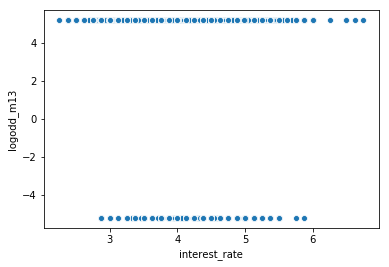

In [143]:
sns.scatterplot(num_data["interest_rate"],num_data["logodd_m13"] )

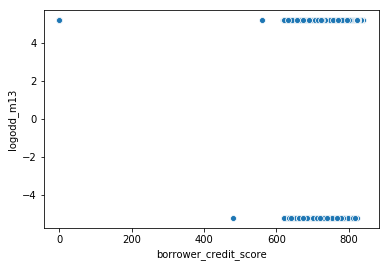

In [144]:
sns.scatterplot(num_data["borrower_credit_score"],num_data["logodd_m13"] )

In [10]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs, make_checkerboard
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier)
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.utils import compute_sample_weight


In [16]:
from sklearn.utils import shuffle
num_data = shuffle(num_data)
x=num_data
x["m13"].value_counts()/x.shape[0]
X, y=x.drop("m13", axis=1).iloc[:,1:3], x["m13"]


In [17]:
1/0.006993

143.000143000143

In [18]:
names = ["Decision Tree","Random Forest", "ExtraTrees"]
# Creating a Python List with our three Tree classifiers
treeclassifiers = [
    DecisionTreeClassifier(max_depth=5, class_weight={0:1 , 1:183 }),
    RandomForestClassifier(max_depth=5, n_estimators=20, max_features=1, class_weight={0:1 , 1:183 }),
    ExtraTreesClassifier(class_weight={0:1 , 1:183 })]

C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



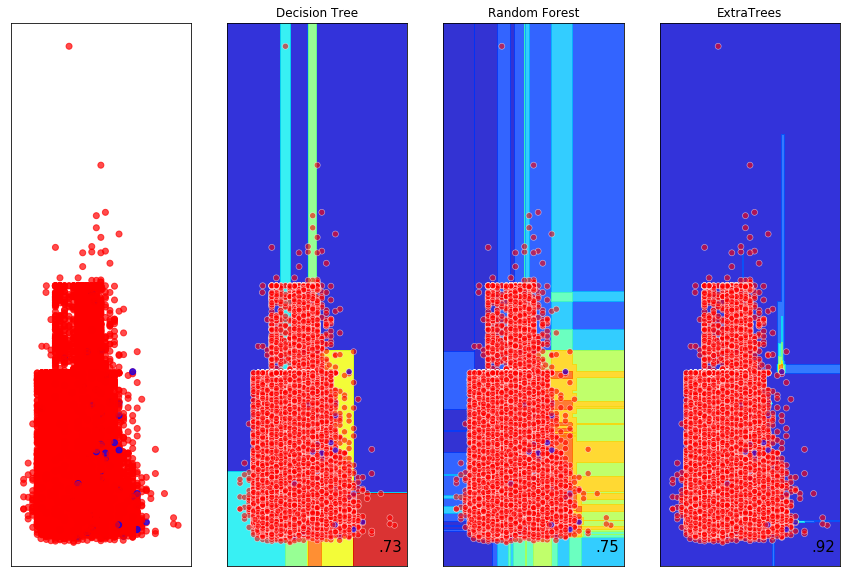

In [19]:
from matplotlib.colors import ListedColormap
figure = plt.figure(figsize=(12, 10))
h = 0.02
i = 1
# iterate over datasets
# for ds in datasets:
#     # preprocess dataset, split into training and test part
#     X, y = ds
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.jet
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, len(treeclassifiers) + 1, i)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.7)
# and testing points
#ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

# iterate over classifiers
for name, clf in zip(names, treeclassifiers):
    ax = plt.subplot(1, len(treeclassifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=.8)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.6, linewidths=0.6, edgecolors="white")
    # and testing points
    #ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               #alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

In [46]:
train_data.head(2)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m11,m12,m13,loan_term_labels,LTV_scale_10,Risk_Level,LTV_quantile_range,LTV_quantile_label,DTI_scale_10,1st pd afterDays
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,Mar,May,95,1.0,...,0,0,1,330-360,10.0,High Risk,"(80.0, 97.0]",75-100Q,2.0,61
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,Jan,Mar,72,1.0,...,1,0,1,330-360,7.0,Good Risk,"(57.0, 72.0]",25-50Q,4.0,60


In [59]:
cat_data=train_data.filter(cat_columns)

In [60]:
cat_data.head(2)

,source,financial_institution,origination_date,first_payment_date,loan_purpose,insurance_type,loan_term_labels,Risk_Level,LTV_quantile_range,LTV_quantile_label
0,Z,"Turner, Baldwin and Rhodes",Mar,May,C86,0.0,330-360,High Risk,"(80.0, 97.0]",75-100Q
1,Y,"Swanson, Newton and Miller",Jan,Mar,B12,0.0,330-360,Good Risk,"(57.0, 72.0]",25-50Q


In [61]:
np.unique(train_data["origination_date"])

array(['Feb', 'Jan', 'Mar'], dtype=object)

In [62]:
dict1={'Feb':2, 'Jan':1, 'Mar':3}

In [63]:
train_data["origination_date"]=train_data["origination_date"].map(dict1)

In [64]:
np.unique(train_data["first_payment_date"])

array(['Apr', 'Feb', 'Mar', 'May'], dtype=object)

In [65]:
dict2={'Apr':4, 'Feb': 2, 'May':5, 'Mar':3}

In [66]:
train_data["first_payment_date"]=train_data["first_payment_date"].map(dict1)

In [67]:
np.unique(train_data["loan_term_labels"])

array(['120-150', '150-180', '180-210', '210-240', '240-270', '270-300',
       '300-330', '330-360', '60-90', '90-120'], dtype=object)

In [68]:
loan_labels=np.array(train_data["loan_term_labels"])

In [75]:
np.unique(loan_labels)


array(['120-150', '150-180', '180-210', '210-240', '240-270', '270-300',
       '300-330', '330-360', '60-90', '90-120'], dtype=object)

In [76]:
dict3={'120-150':3, '150-180':4, '180-210':5, '210-240':6, '240-270':7, '270-300':8,
       '300-330':9, '330-360':10, '60-90':1, '90-120':2}

In [77]:
train_data["loan_term_labels"]=train_data["loan_term_labels"].map(dict3)

In [78]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [79]:
le=LabelEncoder()

In [81]:
source = le.fit_transform(train_data['source'])
source_mappings = {index: label for index, label in enumerate(le.classes_)}
source_mappings

{0: 'X', 1: 'Y', 2: 'Z'}

In [84]:
train_data["source"]=source

In [85]:
finIns = le.fit_transform(train_data['financial_institution'])
finIns_mappings = {index: label for index, label in enumerate(le.classes_)}
finIns_mappings

{0: 'Anderson-Taylor',
 1: 'Browning-Hart',
 2: 'Chapman-Mcmahon',
 3: 'Cole, Brooks and Vincent',
 4: 'Edwards-Hoffman',
 5: 'Martinez, Duffy and Bird',
 6: 'Miller, Mcclure and Allen',
 7: 'Nicholson Group',
 8: 'OTHER',
 9: 'Richards-Walters',
 10: 'Richardson Ltd',
 11: 'Romero, Woods and Johnson',
 12: 'Sanchez, Hays and Wilkerson',
 13: 'Sanchez-Robinson',
 14: 'Suarez Inc',
 15: 'Swanson, Newton and Miller',
 16: 'Taylor, Hunt and Rodriguez',
 17: 'Thornton-Davis',
 18: 'Turner, Baldwin and Rhodes'}

In [86]:
train_data["financial_institution"]=finIns

In [88]:
loan_pur = le.fit_transform(train_data['loan_purpose'])
loan_pur_mappings = {index: label for index, label in enumerate(le.classes_)}
loan_pur_mappings

{0: 'A23', 1: 'B12', 2: 'C86'}

In [ ]:
train_data["loan_purpose"]=loan_pur

### Removing Quasi-Constant features and constant features 

In [39]:
from sklearn.feature_selection import variance_threshold
from sklearn.model_selection import train_test_split

In [12]:
X= num_data.drop("m13", axis=1)
y=num_data["m13"]

In [13]:
x_train, x_test, y_train, y_test= train_test_split(X,y)

In [33]:
constant_filter=variance_threshold.VarianceThreshold(threshold=0.003)

In [34]:
constant_filter.fit(x_train)

VarianceThreshold(threshold=0.003)

In [35]:
len(x_train.columns[constant_filter.get_support()])

25

In [36]:
[i for i in x_train.columns if i not in x_train.columns[constant_filter.get_support()]]

['m2']

In [38]:
x_train=constant_filter.transform(x_train)
x_test=constant_filter.transform(x_test)

###### Quasi-constant features, as the name suggests, are the features that are almost constant.

In [42]:
correlation_features=set()
correlation_matrix=num_data.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if(abs(correlation_matrix.iloc[i,j])>0.8):
            correlation_features.add(correlation_matrix.columns[i])
correlation_features

{'DTI_scale_10',
 'LTV_scale_10',
 'co-borrower_credit_score',
 'm10',
 'm11',
 'm12',
 'm9'}

In [50]:
num_data.filter(correlation_features).head(3)

,co-borrower_credit_score,LTV_scale_10,DTI_scale_10,m11,m12,m9,m10
0,0.0,10.0,2.0,0,0,0,0
1,0.0,7.0,4.0,1,0,0,0
2,0.0,5.0,3.0,0,0,0,0


In [69]:
num_data[num_data.filter(['m9', 'm10','m11','m12']).all(1)].filter(['m9', 'm10','m11','m12', "m13"]).tail(6).index

Int64Index([10779, 25955, 30552, 73689, 100484, 103645], dtype='int64')

In [72]:
train_data.iloc[[10779, 25955, 30552, 73689, 100484, 103645], 1:9]

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value
10779,X,OTHER,4.125,79000,360,Feb,Apr,64
25955,X,"Romero, Woods and Johnson",4.250,157000,240,Jan,Mar,50
30552,Y,Browning-Hart,4.500,417000,360,Jan,Mar,67
73689,X,OTHER,4.875,197000,360,Feb,Apr,80
100484,Y,Edwards-Hoffman,3.875,50000,120,Jan,Mar,36
103645,X,OTHER,3.500,190000,180,Mar,May,71


In [73]:
train_data.iloc[[10779, 25955, 30552, 73689, 100484, 103645], 9:18]

,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2
10779,2.0,45.0,621.0,B12,0.0,651.0,0.0,1,1
25955,1.0,46.0,775.0,B12,0.0,0.0,0.0,0,0
30552,1.0,35.0,664.0,B12,0.0,0.0,0.0,0,0
73689,1.0,32.0,694.0,B12,0.0,0.0,0.0,0,0
100484,1.0,40.0,622.0,B12,0.0,0.0,0.0,0,0
103645,1.0,44.0,718.0,B12,0.0,0.0,0.0,0,0


In [79]:
last4monthsdefault=num_data[num_data.filter(['m9', 'm10','m11','m12',"m13"]).all(1)]

In [84]:
last4monthsdefault.filter(num_data).describe().iloc[:,1:9]

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,4.365305,175929.687500,333.093750,71.984375,1.273438,37.046875,700.000000,2.695312
std,0.458529,99773.932151,63.493497,14.297725,0.447475,7.683564,53.677221,7.919435
min,3.000000,41000.000000,120.000000,11.000000,1.000000,16.000000,480.000000,0.000000
25%,4.000000,104500.000000,360.000000,68.750000,1.000000,33.000000,659.750000,0.000000
50%,4.375000,142000.000000,360.000000,75.000000,1.000000,38.000000,690.000000,0.000000
75%,4.625000,238000.000000,360.000000,80.000000,2.000000,43.000000,738.000000,0.000000
max,5.750000,417000.000000,360.000000,95.000000,2.000000,50.000000,815.000000,30.000000


In [85]:
last4monthsdefault.filter(num_data).describe().iloc[:,9:18]

,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7
count,128.000000,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,195.929688,0.0,0.179688,0.312500,0.406250,0.593750,0.984375,1.242188,1.507812
std,322.021939,0.0,0.459949,0.672871,0.864319,1.082702,1.345651,1.658887,1.894859
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,647.250000,0.0,0.000000,0.000000,0.250000,1.000000,1.000000,2.000000,2.000000
max,810.000000,0.0,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000


In [86]:
last4monthsdefaultN=last4monthsdefault.filter(num_data)

In [87]:
covarmat=np.cov(last4monthsdefaultN, rowvar=False)

In [89]:
covarmat

array([[ 6.82483239e+22,  1.27196953e+10, -2.66076888e+15,
        -4.53303306e+11,  3.37463237e+10, -7.02902691e+09,
        -7.74863814e+10, -1.32689975e+12, -1.01957098e+11,
        -5.41778278e+12,  0.00000000e+00, -9.15444927e+08,
         6.37726379e+09,  4.93777919e+09, -8.02249534e+09,
        -1.60832312e+10, -1.54664500e+10, -8.07298323e+09,
        -5.05992888e+08, -9.78579755e+09, -1.86119097e+10,
        -2.70565192e+09,  1.06743066e+10,  0.00000000e+00,
        -6.85303653e+08, -1.51865201e+10,  1.75039313e+11],
       [ 1.27196953e+10,  2.10248812e-01, -1.01306005e+04,
         1.20772389e+01,  4.93626845e-01, -1.11075910e-02,
         1.83521038e-01, -7.61303150e+00, -5.87245017e-01,
        -9.79410439e+00,  0.00000000e+00,  3.72434793e-03,
         3.05339567e-02,  7.56232776e-02,  3.93767224e-02,
         7.04772392e-02,  8.55161786e-02,  7.95429380e-03,
        -8.79761319e-03, -6.15958415e-02, -9.14416216e-02,
        -1.14036786e-01, -1.18164985e-01,  0.00000000e+